In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
sns.set(rc={'figure.figsize': [15, 15]},font_scale=1.5)

In [ ]:
su = pd.read_csv("50_Startups.csv")
su.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
print(su.info())
print(su.describe().T)
print(su.State.describe())
print(su['State'].value_counts().head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
                 count         mean            std       min          25%  \
R&D Spend         50.0   73721.6156   45902.256482      0.00   39936.3700   
Administration    50.0  121344.6396   28017.802755  51283.14  103730.8750   
Marketing Spend   50.0  211025.0978  122290.310726      0.00  129300.1325   
Profit            50.0  112012.6392   40306.180338  14681.40   90138.9025   

                        50%          75%        max  
R&D Spend         73051.080  101602.8000  165349.20  
Administration   122699.7

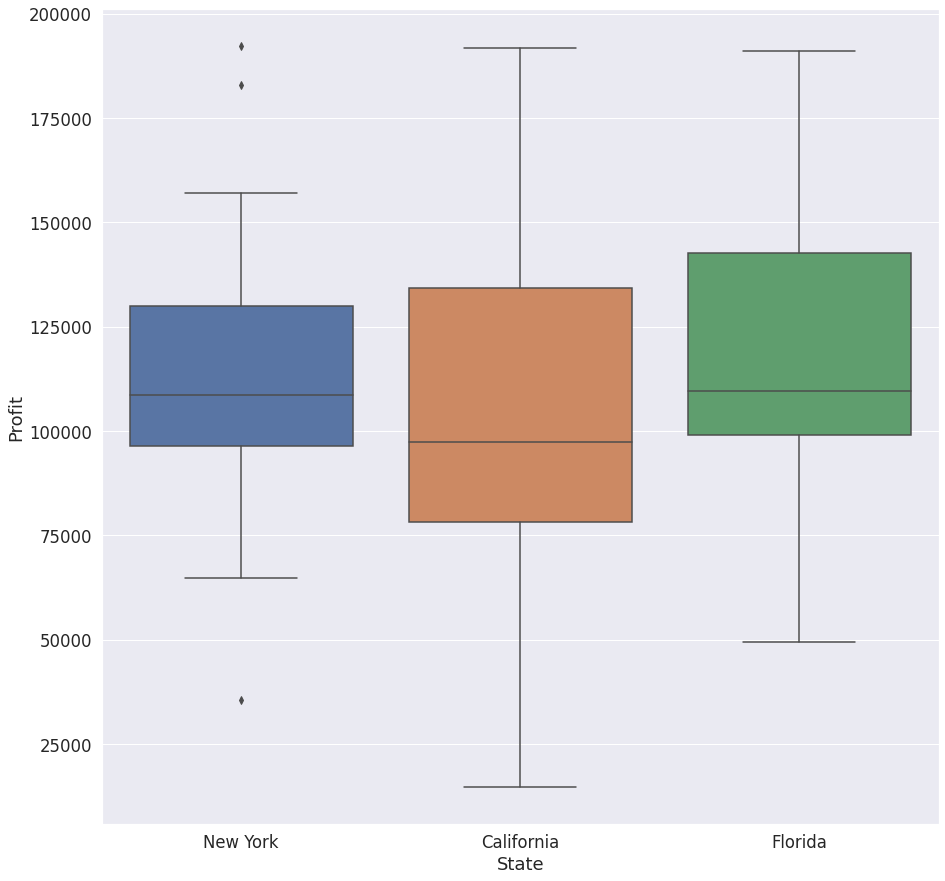

In [ ]:
sns.boxplot(data=su ,y="Profit",x="State")

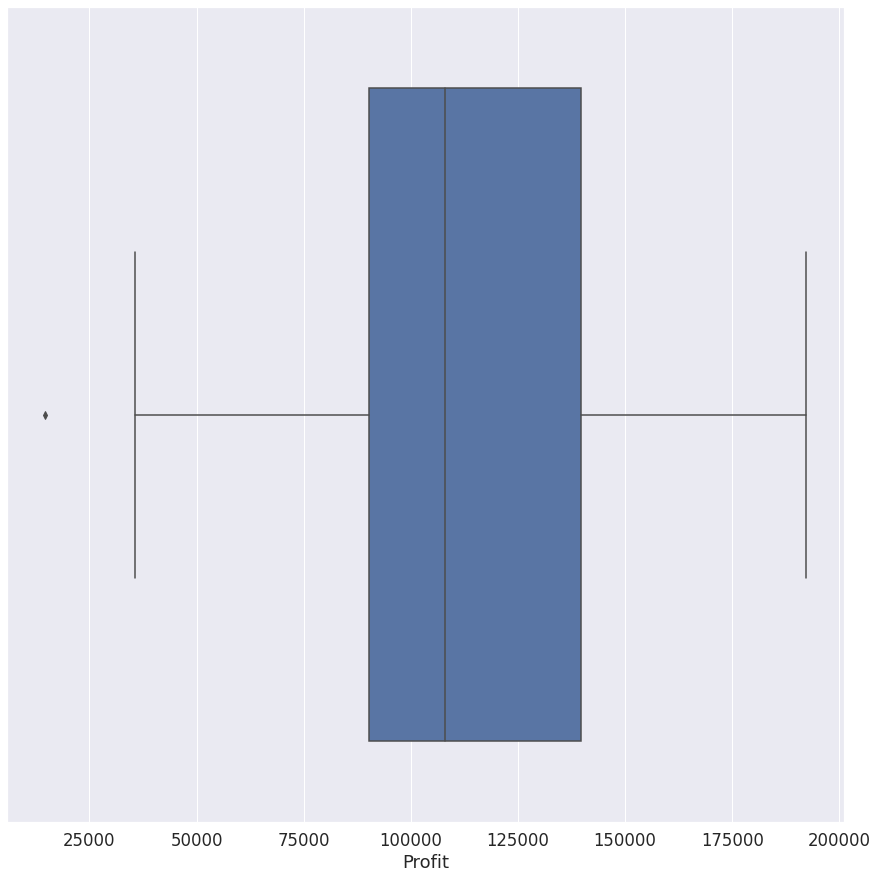

In [ ]:
su=pd.get_dummies(su,columns=['State'])
sns.boxplot(data=su ,x="Profit")

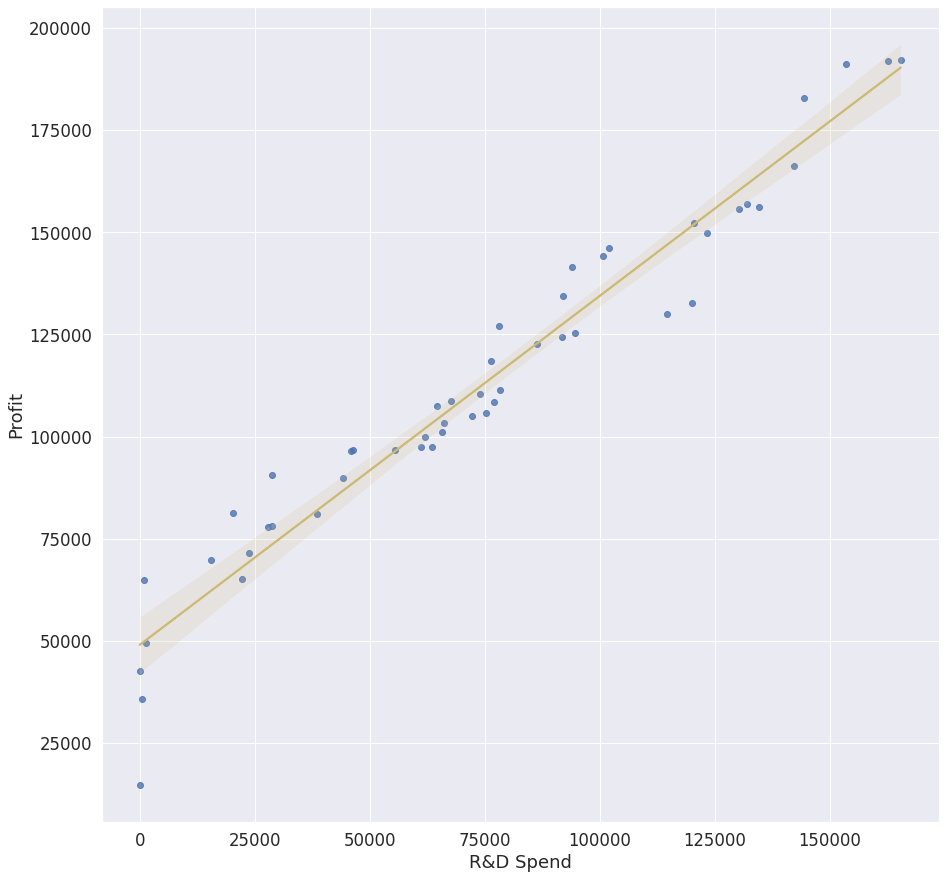

In [ ]:
sns.regplot(data=su, x="R&D Spend", y="Profit", line_kws={'color': 'y'})

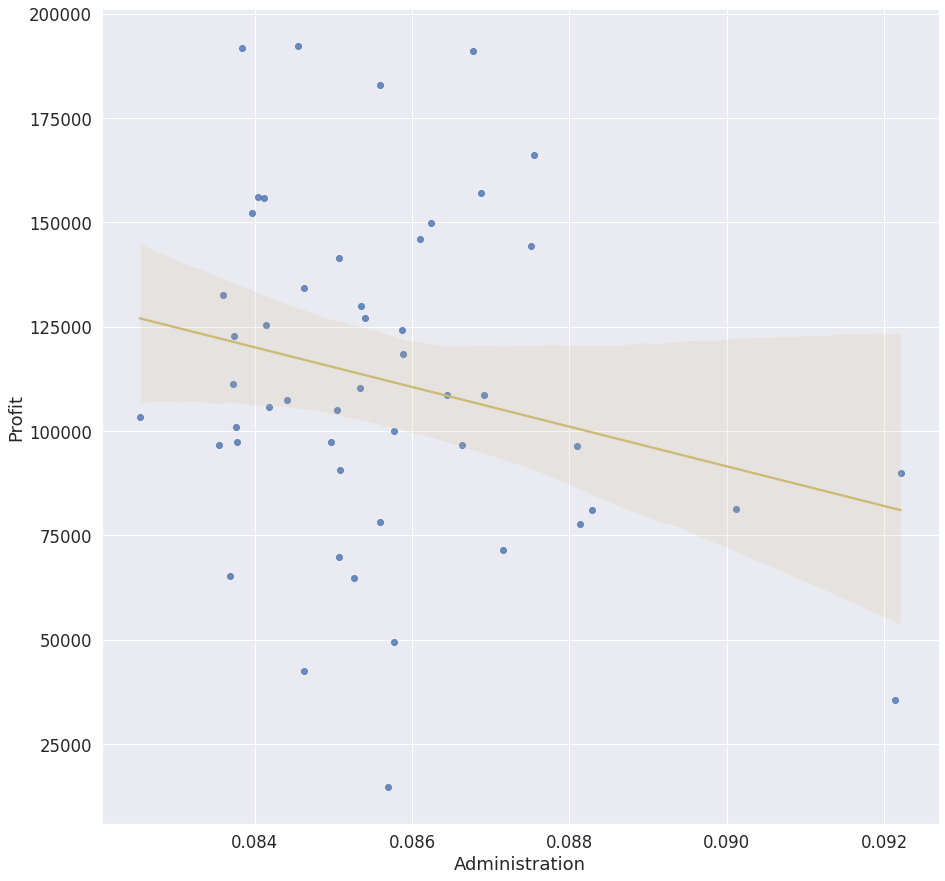

In [ ]:
sns.regplot(data=su, x= 1/(np.log((su["Administration"]))), y=su["Profit"], line_kws={'color': 'y'})

In [ ]:
su["Administration"] = 1/np.log(su["Administration"])


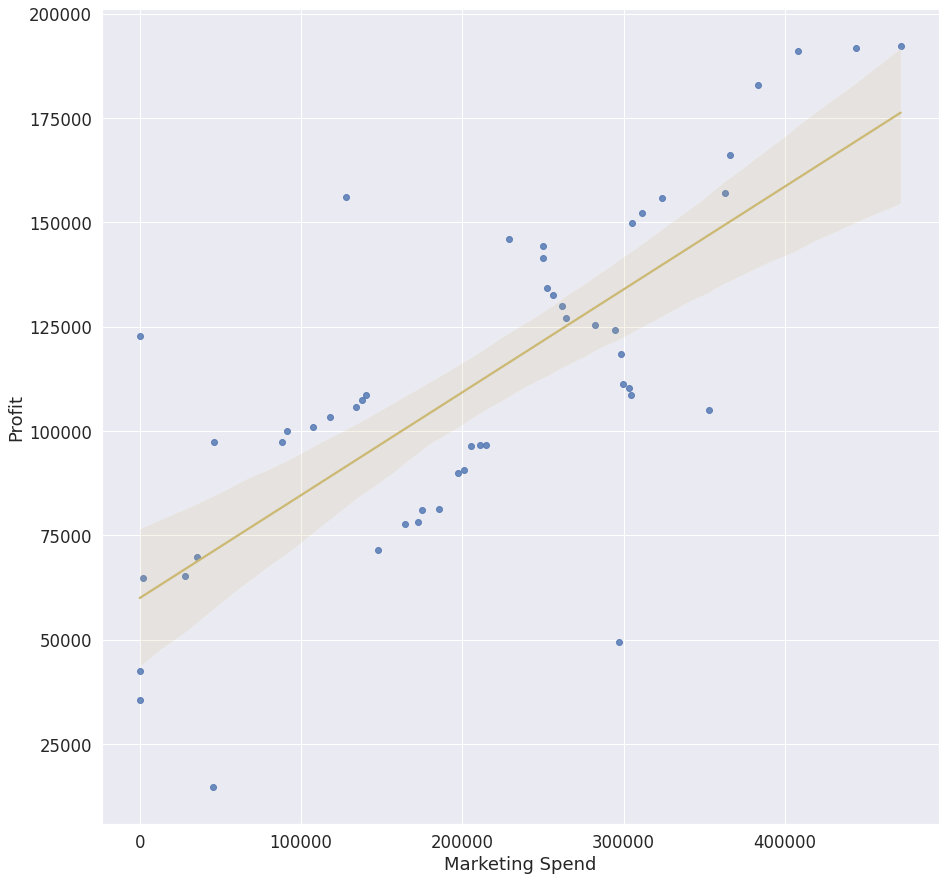

In [ ]:
sns.regplot(data=su, x="Marketing Spend", y=su["Profit"], line_kws={'color': 'y'})

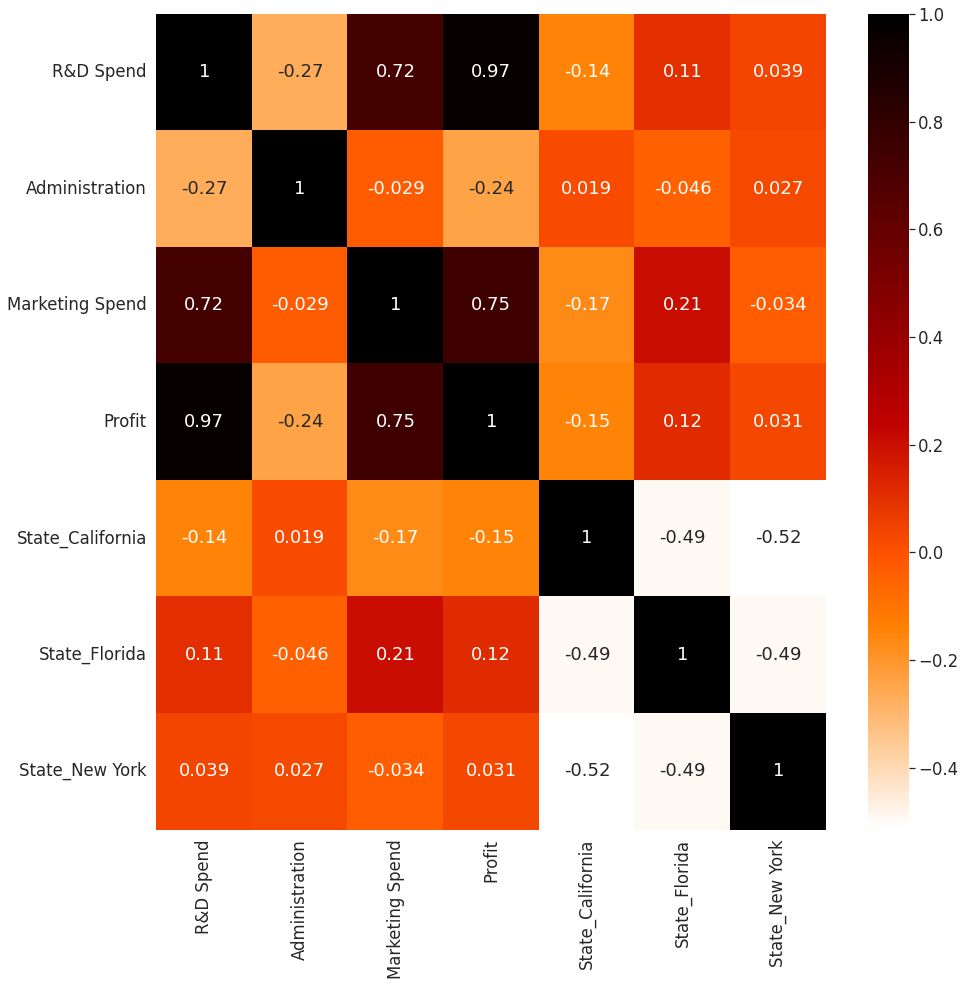

In [ ]:
sns.heatmap(su.corr() ,annot=True ,cmap="gist_heat_r")

In [ ]:
print(su.describe().T)
print(su.iloc[:,:4])


                  count           mean            std          min  \
R&D Spend          50.0   73721.615600   45902.256482      0.00000   
Administration     50.0       0.085696       0.002015      0.08254   
Marketing Spend    50.0  211025.097800  122290.310726      0.00000   
Profit             50.0  112012.639200   40306.180338  14681.40000   
State_California   50.0       0.340000       0.478518      0.00000   
State_Florida      50.0       0.320000       0.471212      0.00000   
State_New York     50.0       0.340000       0.478518      0.00000   

                            25%            50%            75%            max  
R&D Spend          39936.370000   73051.080000  101602.800000  165349.200000  
Administration         0.084151       0.085342       0.086584       0.092207  
Marketing Spend   129300.132500  212716.240000  299469.085000  471784.100000  
Profit             90138.902500  107978.190000  139765.977500  192261.830000  
State_California       0.000000       0.0000

In [ ]:
sc=StandardScaler()
su.iloc[:,:4]=sc.fit_transform(su.iloc[:,:4])

In [ ]:
x=su.drop("Profit",axis=1)
y=su["Profit"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
models={'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(),
    'SVR':SVR(kernel='linear'),
    'RF':RandomForestRegressor(n_estimators=30)}

In [ ]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'training accuaracy: {model.score(x_train,y_train)}')
    print(f'testing accuaracy: {model.score(x_test,y_test)}')
    print(f'r2 - testing:{r2_score(y_test,y_pred)} ')

using: LR
training accuaracy: 0.9624664570413939
testing accuaracy: 0.9023361711217842
r2 - testing:0.9023361711217842 
using: KNN
training accuaracy: 0.7478199926565914
testing accuaracy: 0.9136602665347976
r2 - testing:0.9136602665347976 
using: DT
training accuaracy: 1.0
testing accuaracy: 0.9077298145826878
r2 - testing:0.9077298145826878 
using: SVR
training accuaracy: 0.9585878955329172
testing accuaracy: 0.9219847492183673
r2 - testing:0.9219847492183673 
using: RF
training accuaracy: 0.9908882957931391
testing accuaracy: 0.918039518041557
r2 - testing:0.918039518041557 


In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
features=x.columns
features

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_California',
       'State_Florida', 'State_New York'],
      dtype='object')

In [ ]:
joblib.dump(features, 'features.h5')
joblib.dump(model, 'model.h5')
joblib.dump(sc, 'scaler.h5')

['scaler.h5']